In [1]:
import pandas
import uproot
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
bc_tree = uproot.open('/eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root')['events']
bb_tree = uproot.open('/eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen.root')['events']
tree_gen = uproot.open("/eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root")["metadata"]

In [3]:
bc_df = bc_tree.arrays(library="pd", how="zip", filter_name=["EVT_*"])
bb_df = bb_tree.arrays(library="pd", how="zip", filter_name=["EVT_*"])
df_gen = tree_gen.arrays(library="pd", how="zip")

In [11]:
var_1 = 'EVT_MVA1'
var_2 = 'EVT_MVA2'

In [12]:
N_Z0 = 5*10**(12)
BF_Zbb = 0.1512
f_Bc = 0.0004
f_Bu = 0.43
BF_Bctaunu = 0.0194
BF_Butaunu = 1.09*10**(-4)
BF_tau3pion = 0.0931

In [13]:
total_nb_gen = df_gen.iloc[0]["eventsProcessed"]

#Variable_1
nb_signal_events_1 = len(bc_df[var_1])
nb_incl_bkg_events_1 = len(bb_df[var_1])

initial_eff_signal_1 = nb_signal_events_1/total_nb_gen
initial_eff_incl_bkg_1 = nb_incl_bkg_events_1/total_nb_gen

#Variable_2
nb_signal_events_2 = len(bc_df[var_2])
nb_incl_bkg_events_2 = len(bb_df[var_2])

initial_eff_signal_2 = nb_signal_events_2/total_nb_gen
initial_eff_incl_bkg_2 = nb_incl_bkg_events_2/total_nb_gen

In [14]:
def S_cut(initial_eff_signal, cut_eff) :
    return N_Z0*BF_Zbb*2*f_Bc*BF_Bctaunu*BF_tau3pion*initial_eff_signal*cut_eff

def B_incl_cut(initial_eff_incl_bkg, cut_eff) :
    return N_Z0*BF_Zbb*2*initial_eff_incl_bkg*cut_eff

In [20]:
#Variable 1
var = var_1 #:)
nb_signal_events = nb_signal_events_1 #:)
nb_incl_bkg_events = nb_incl_bkg_events_1 #:)
initial_eff_signal = initial_eff_signal_1 #:)
initial_eff_incl_bkg = initial_eff_incl_bkg_1 #:)

initial_cut = 0.95
max_cut_value = bb_df[var].max()
cut_step = 0.0005

cut = np.arange(initial_cut, max_cut_value, cut_step)
p_tab = np.zeros(np.size(cut))


for i, cut_i in enumerate(cut) :
    
    df_signal = bc_df[bc_df[var] > cut_i]
    df_bkg = bb_df[bb_df[var] > cut_i]

    cut_eff_signal = len(df_signal)/nb_signal_events
    cut_eff_bkg = len(df_bkg)/nb_incl_bkg_events

    s = S_cut(initial_eff_signal, cut_eff_signal)
    b = B_incl_cut(initial_eff_incl_bkg, cut_eff_bkg)
        
    p_tab[i] = s/(s+b)
    
print (p_tab)

[5.07350546e-05 5.10669782e-05 5.14018008e-05 5.17119066e-05
 5.20432036e-05 5.24020515e-05 5.27371935e-05 5.30614210e-05
 5.34276492e-05 5.38069430e-05 5.42094175e-05 5.45830463e-05
 5.49401294e-05 5.53315863e-05 5.57941855e-05 5.62164388e-05
 5.66759868e-05 5.70876984e-05 5.75370823e-05 5.80059626e-05
 5.84410111e-05 5.89055167e-05 5.93660485e-05 5.98810897e-05
 6.04017359e-05 6.09746330e-05 6.14809263e-05 6.20757070e-05
 6.25755264e-05 6.31110848e-05 6.37145302e-05 6.42934465e-05
 6.48990006e-05 6.55234686e-05 6.62281807e-05 6.69016028e-05
 6.74706996e-05 6.82213899e-05 6.89200336e-05 6.96681166e-05
 7.04636904e-05 7.12894129e-05 7.20992282e-05 7.29296673e-05
 7.37382884e-05 7.46476976e-05 7.55962989e-05 7.65843225e-05
 7.76624724e-05 7.86519171e-05 7.96620250e-05 8.08607706e-05
 8.19539159e-05 8.30520154e-05 8.42794114e-05 8.56149644e-05
 8.68704817e-05 8.81511020e-05 8.94551224e-05 9.09381582e-05
 9.24903873e-05 9.41408478e-05 9.58981863e-05 9.76714733e-05
 9.95369343e-05 1.015769

[]

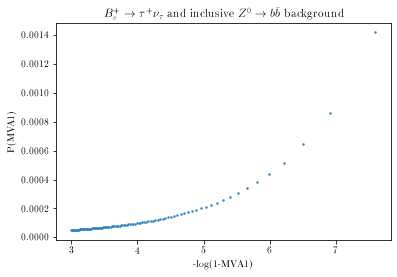

In [30]:
plt.figure()
plt.scatter(-np.log(1-cut), p_tab, color= '#3182bd', s=2)
plt.xlabel('-log(1-MVA1)')
plt.ylabel('P(MVA1)')
plt.title(r'$B_c^+ \rightarrow \tau^+ \nu_\tau$ and inclusive $Z^0 \rightarrow b\bar{b}$ background')
plt.plot()

In [26]:
#Variable 2
var = var_2 #:)
nb_signal_events = nb_signal_events_2 #:)
nb_incl_bkg_events = nb_incl_bkg_events_2 #:)
initial_eff_signal = initial_eff_signal_2 #:)
initial_eff_incl_bkg = initial_eff_incl_bkg_2 #:)

initial_cut = 0.95
max_cut_value = bb_df[var].max()
cut_step = 0.0005

cut_bis = np.arange(initial_cut, max_cut_value, cut_step)
p_tab_bis = np.zeros(np.size(cut))


for i, cut_i in enumerate(cut) :
    
    df_signal = bc_df[bc_df[var] > cut_i]
    df_bkg = bb_df[bb_df[var] > cut_i]

    cut_eff_signal = len(df_signal)/nb_signal_events
    cut_eff_bkg = len(df_bkg)/nb_incl_bkg_events

    s = S_cut(initial_eff_signal, cut_eff_signal)
    b = B_incl_cut(initial_eff_incl_bkg, cut_eff_bkg)
        
    p_tab_bis[i] = s/(s+b)
    
print (p_tab_bis)

[0.00010057 0.00010135 0.00010222 0.00010307 0.0001039  0.00010471
 0.00010556 0.0001064  0.00010735 0.00010837 0.0001093  0.00011024
 0.00011132 0.00011242 0.00011357 0.00011473 0.00011589 0.00011701
 0.00011794 0.00011928 0.00012048 0.00012178 0.00012294 0.00012438
 0.00012571 0.00012728 0.00012878 0.00013049 0.00013192 0.00013327
 0.00013482 0.0001365  0.00013797 0.00013943 0.00014127 0.00014276
 0.00014465 0.00014637 0.00014831 0.00015008 0.00015176 0.00015379
 0.00015579 0.00015825 0.00016092 0.0001634  0.00016562 0.0001685
 0.00017151 0.00017437 0.00017717 0.00018065 0.00018386 0.00018701
 0.00019014 0.00019306 0.00019633 0.0002004  0.0002038  0.00020732
 0.00021122 0.00021561 0.00021996 0.00022437 0.00022897 0.00023479
 0.0002407  0.00024724 0.00025321 0.0002599  0.00026639 0.00027299
 0.00027966 0.00028689 0.00029688 0.00030626 0.00031721 0.00032535
 0.00033381 0.00034739 0.00036354 0.00038161 0.00039356 0.00041054
 0.00043052 0.00045414 0.00047775 0.00050437 0.00052352 0.00055

[]

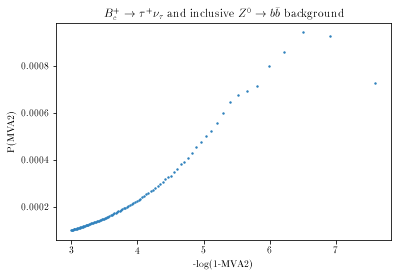

In [31]:
plt.figure()
plt.scatter(-np.log(1-cut_bis), p_tab_bis, color= '#3182bd', s=2)
plt.xlabel('-log(1-MVA2)')
plt.ylabel('P(MVA2)')
plt.title(r'$B_c^+ \rightarrow \tau^+ \nu_\tau$ and inclusive $Z^0 \rightarrow b\bar{b}$ background')
plt.plot()